In [1]:
!pip install transformers numpy

## [rut5-base-paraphraser](https://huggingface.co/cointegrated/rut5-base-paraphraser)

In [2]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

MODEL_NAME = 'cointegrated/rut5-base-paraphraser'

model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME)
tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)
model.cuda();
model.eval();

def paraphrase(text, beams=3, grams=3, do_sample=False):
    x = tokenizer(text, return_tensors='pt', padding=True).to(model.device)
    out = model.generate(**x, encoder_no_repeat_ngram_size=grams, num_beams=beams,
                         max_length=52, min_length=40,  do_sample=do_sample,
                         top_p=0.9)
    return tokenizer.decode(out[0], skip_special_tokens=True)

# print(paraphrase('Каждый охотник желает знать, где сидит фазан.'))
# Все охотники хотят знать где фазан сидит.

In [3]:
import pandas as pd

df_to_abstractive_summarize = pd.read_csv('extract_summ_final.csv') \
                              .drop(['full_text', 'description', 'to_summarization'],axis = 1)

print(df_to_abstractive_summarize.shape)
df_to_abstractive_summarize[100:105]

(49988, 2)


,sumy_LSA,sumy_TextRank
100,В столовую крупной компании на Московском шос...,В столовую крупной компании на Московском шос...
101,Дополнительные работы по обслуживанию иных ин...,Монтаж инженерных систем водоснабжения. Допол...
102,Требуются рабочие на производство. Работа на ...,Требуются рабочие на производство. с 7 до 19....
103,Требуются рабочие на производство. Наладчик м...,Требуются рабочие на производство. Наладчик м...
104,ходатайства и пр. Подача документов в различн...,ходатайства и пр. Подача документов в различн...


In [4]:
def min_max_200_300(input):
    if 200 < len(input) < 300:
        return True
    return False

def min_max_150_200(input):
    if 150 < len(input) < 200:
        return True
    return False

def min_max_100_200(input):
    if 100 < len(input) < 200:
        return True
    return False

def min_max_300_400(input):
    if 300 < len(input) < 400:
        return True
    return False
def min_max_0_100(input):
    if 0 < len(input) < 100:
        return True
    return False

lenght = df_to_abstractive_summarize.shape[0]

df_200_300 = df_to_abstractive_summarize[df_to_abstractive_summarize['sumy_LSA'].apply(min_max_200_300)].shape[0]
df_100_200 = df_to_abstractive_summarize[df_to_abstractive_summarize['sumy_LSA'].apply(min_max_100_200)].shape[0]
df_150_200 = df_to_abstractive_summarize[df_to_abstractive_summarize['sumy_LSA'].apply(min_max_150_200)].shape[0]
df_300_400 = df_to_abstractive_summarize[df_to_abstractive_summarize['sumy_LSA'].apply(min_max_300_400)].shape[0]
df_0_100 = df_to_abstractive_summarize[df_to_abstractive_summarize['sumy_LSA'].apply(min_max_0_100)].shape[0]
print('3 предложения после экстракции')
print('Длинна 200-300 символов:', df_200_300/lenght*100, '% процентов')
print('Длинна 100-200 символов:', df_100_200/lenght*100, '% процентов')
print('Длинна 150-200 символов:', df_150_200/lenght*100, '% процентов')
print('Длинна 300-400 символов:', df_300_400/lenght*100, '% процентов')
print('Длинна 0-100 символов:', df_0_100/lenght*100, '% процентов')

TypeError: object of type 'float' has no len()

## проверил для LSA
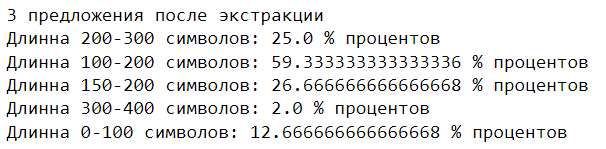
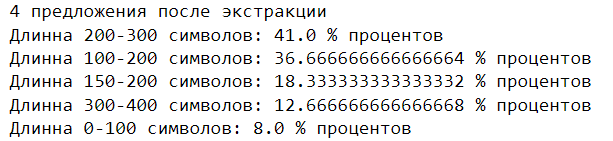
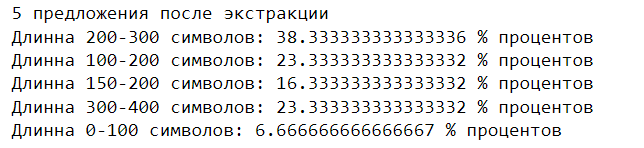


In [16]:
def min_max_paraphrase(input):
    if type(input) == str:
        if 200 < len(input):
            return paraphrase(input)
            
    return False

# df_to_abstractive_summarize = df_to_abstractive_summarize[df_to_abstractive_summarize['sumy_LSA'].apply(min_max)]


In [ ]:
%%time
resume_count = 10

df_to_abstractive_summarize['rut5-base-paraphraser(LSA)'] = df_to_abstractive_summarize['sumy_LSA'].apply(min_max_paraphrase)
df_to_abstractive_summarize['rut5-base-paraphraser(TextRank)'] = df_to_abstractive_summarize['sumy_TextRank'].apply(min_max_paraphrase)

# df_to_abstractive_summarize['rut5-base-paraphraser(LexRank)'] = df_to_abstractive_summarize['sumy_LexRank'][:resume_count].apply(paraphrase)
# df_to_abstractive_summarize['rut5-base-paraphraser(Luhn)'] = df_to_abstractive_summarize['sumy_Luhn'][:resume_count].apply(paraphrase)
# df_to_abstractive_summarize['rut5-base-paraphraser(KLdiv)'] = df_to_abstractive_summarize['sumy_KLdiv'][:resume_count].apply(paraphrase)

# df_extract_summarization['sumy_Luhn'] = df_extract_summarization['to_summarization'][:resume_count].apply(summarization_pipline_sumy_Luhn)
# df_extract_summarization['sumy_LSA'] = df_extract_summarization['to_summarization'][:resume_count].apply(summarization_pipline_sumy_LSA)
# df_extract_summarization['sumy_TextRank'] = df_extract_summarization['to_summarization'][:resume_count].apply(summarization_pipline_sumy_TextRank)
# df_extract_summarization['sumy_KLdiv'] = df_extract_summarization['to_summarization'][:resume_count].apply(summarization_pipline_sumy_KLdiv)

# df_to_abstractive_summarize.head()
# df_to_abstractive_summarize[5:10]

In [9]:
df_to_abstractive_summarize

,sumy_LSA,sumy_TextRank
0,выкладка товара. поддержание чистоты. Смена с...,выкладка товара. поддержание чистоты. Смена с...
1,Приемка и контроль качества сырья. участие в ...,Приемка и контроль качества сырья. участие в ...
2,В связи с расширением объема услуг. в агентст...,в агентство недвижимости требуется кадастровы...
3,Вот уже 15 лет все платья создаются в Ростове...,Выпускается 12 коллекций в год. до 80 различн...
4,Пошив чехлов на мягкую мебель. можно обучение...,Пошив чехлов на мягкую мебель. можно обучение...
...,...,...
49983,Возможность карьерного роста до начальника от...,приглашает на работу рекрутера. Подбор кандид...
49984,работа со входящими заявками. контроль и веде...,работа со входящими заявками. контроль отгруз...
49985,порядка поиска повреждений и проведения авари...,ВОЛС-ВЛ. измерение технических характеристик ...
49986,специализируется на продаже натуральных проду...,Плюсы работы у нас. Стабильность и уверенност...


In [ ]:
# number = 41
# print(len(df_to_abstractive_summarize['rut5-base-paraphraser(LSA)'][number]))
# print(len(df_to_abstractive_summarize['rut5-base-paraphraser(TextRank)'][number]))

In [ ]:
# df_to_abstractive_summarize[:10]

#  итог от Никиты

    Лучше экстрактивно брать 3 предложения.
    100 вакансий 5 методов  = 15 минут
    А после абстракции лучше всего результат у TextRank, LSA 

In [ ]:
# pd.set_option('display.max_colwidth', 300)
# df_to_abstractive_summarize[['sumy_LSA','rut5-base-paraphraser(LSA)']].head()

In [7]:
df_to_abstractive_summarize.to_csv('abstract_summarizer_final.csv', index=False)